# Statistik Überblick

Zusammenfassung und grober überblick

---


# Würfel­beispiel: N = 100 Würfe

- **Relative Häufigkeit**  
  “Die relative Häufigkeit zeigt, wie oft ein Ergebnis im Verhältnis zur Gesamtzahl auftritt.”  
  | Augenzahl | Häufigkeit | Relative Häufigkeit |
  |----------:|-----------:|--------------------:|
  | 1         | 12         | 0.12                |
  | 2         | 17         | 0.17                |
  | 3         | 16         | 0.16                |
  | 4         | 18         | 0.18                |
  | 5         | 20         | 0.20                |
  | 6         | 17         | 0.17                |
  | **Summe** | **100**    | **1.00**            |
<br/>

- **Zufallsvariable** X steht für das Ergebnis eines Wurfs

- **Mittelwert (Durchschnitt)**  
  “Der Mittelwert ist die Summe aller Werte geteilt durch die Anzahl der Beobachtungen.”  
  *Beispiel:* (Summe aller geworfenen Augen) ÷ 100.

- **Median**  
  “Der Median teilt die sortierten Daten in zwei gleich große Hälften.”  
  *Beispiel:* Werte an Position 50 und 51 im sortierten Datensatz → (Wert₅₀ + Wert₅₁)/2.

- **Modus**  
  “Der Modus ist der Wert, der am häufigsten vorkommt.”  
  *Beispiel:* Augenzahl mit der höchsten absoluten Häufigkeit.

- **Varianz**  
  “Die Varianz ist der durchschnittliche quadrierte Abstand aller Werte vom Mittelwert.”  
  *Beispiel:* Durchschnitt der $(x_i - \bar{x})^2$ über alle 100 Würfe.

- **Standardabweichung**  
  “Die Standardabweichung ist die Wurzel aus der Varianz und gibt die durchschnittliche Streuung in Originaleinheiten an.”  
   $\sqrt{\text{Varianz}}$.

## Theoretische Verteilung

- **Gleichverteilung**  
  Ein fairer sechsseitiger Würfel folgt der diskreten Gleichverteilung  
  $\displaystyle P(X = k) = \frac{1}{6},\quad k \in \{1,2,3,4,5,6\}.$

- **Wahrscheinlichkeitsfunktion (PMF)**  
  $\displaystyle p_X(k) = P(X = k) = \frac{1}{6}.$

- **Theoretischer Erwartungswert**  
  $\displaystyle E[X] = \sum_{k=1}^{6} k \cdot \frac{1}{6} = 3{,}5.$

- **Theoretische Varianz**  
  $\displaystyle \mathrm{Var}(X) = \sum_{k=1}^{6} (k - 3{,}5)^2 \cdot \frac{1}{6} = \frac{35}{12} \approx 2{,}9167.$

- **Theoretische Standardabweichung**  
  $\displaystyle \sigma = \sqrt{\frac{35}{12}} \approx 1{,}7078.$

- **Vergleich Empirie vs. Theorie**  
  - Empirischer Mittelwert $\bar{x}$ aus 100 Würfen vs. theoretischer Erwartungswert $E[X] = 3{,}5$  
  - Empirische Varianz $s^2$ vs. theoretische Varianz $\mathrm{Var}(X) = 35/12$


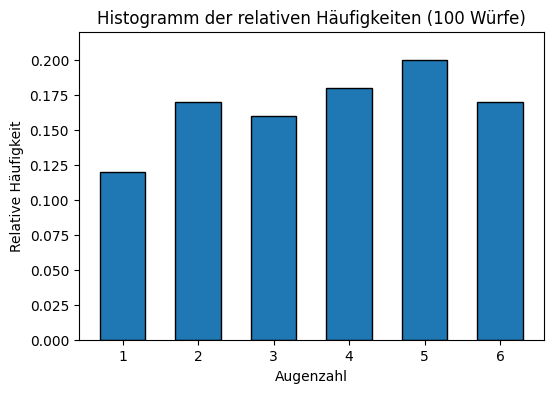

In [2]:
import matplotlib.pyplot as plt

# Gegebene Daten
augenzahlen = [1, 2, 3, 4, 5, 6]
haeufigkeiten = [12, 17, 16, 18, 20, 17]
relative_haeufigkeiten = [h / 100 for h in haeufigkeiten]

# Plot
plt.figure(figsize=(6,4))
plt.bar(augenzahlen, relative_haeufigkeiten, width=0.6, edgecolor='black')
plt.xlabel('Augenzahl')
plt.ylabel('Relative Häufigkeit')
plt.title('Histogramm der relativen Häufigkeiten (100 Würfe)')
plt.xticks(augenzahlen)
plt.ylim(0, max(relative_haeufigkeiten) * 1.1)
plt.show()

# Urnenmodell

Ein klassisches Urnenbeispiel zeigt, wie Wahrscheinlichkeiten und Häufigkeiten zusammenhängen.

---

## 1. Urnenzusammensetzung

| Farbe | Anzahl Bälle | Theoretische Wahrscheinlichkeit |
|:------|-------------:|:-------------------------------:|
| Rot   |           10 | $10/18 \approx 0{,}556$         |
| Blau  |            5 | $5/18 \approx 0{,}278$          |
| Grün  |            3 | $3/18 \approx 0{,}167$          |
| **Summe** |      **18** | **1,00**                        |

---

## 2. Merksätze

- **Urnenmodell**  
  „Eine Urne enthält Bälle verschiedener Typen; Ziehen Sie Bälle, um Wahrscheinlichkeiten zu modellieren.“

- **Ziehung mit Zurücklegen**  
  „Jede Ziehung ist unabhängig: nach jeder Entnahme kommt der Ball zurück in die Urne.“

- **Ziehung ohne Zurücklegen**  
  „Die Wahrscheinlichkeiten ändern sich nach jeder Entnahme, da die Urne schrumpft.“

- **Hypergeometrische Verteilung**  
  „Gibt die Wahrscheinlichkeit an, in einer Stichprobe ohne Zurücklegen genau \(k\) Bälle eines Typs zu ziehen.“  
  $$P(X=k)=\frac{\binom{K}{k}\,\binom{N-K}{n-k}}{\binom{N}{n}}$$  
  mit  
  - \(N\): Gesamtzahl Bälle (hier 18)  
  - \(K\): Anzahl Ziele (z. B. rote Bälle = 10)  
  - \(n\): Stichprobenumfang (z. B. 5 Ziehungen)  
  - \(k\): Erfolge (z. B. gezogene rote Bälle)

- **Erwartungswert (ohne Zurücklegen)**  
  $$E[X] = n\frac{K}{N}$$

- **Varianz (ohne Zurücklegen)**  
  $$\mathrm{Var}(X) = n\frac{K}{N}\frac{N-K}{N}\frac{N-n}{N-1}$$



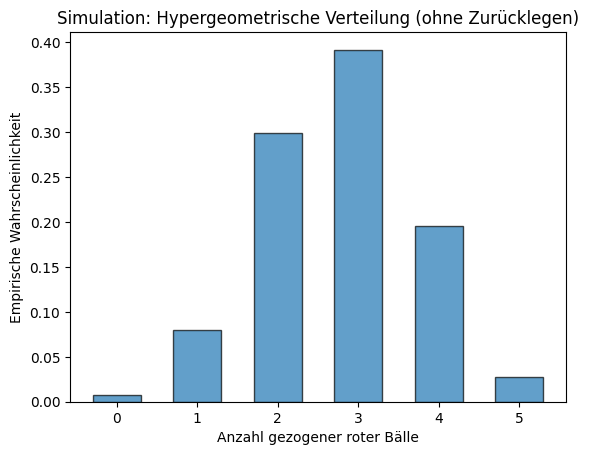

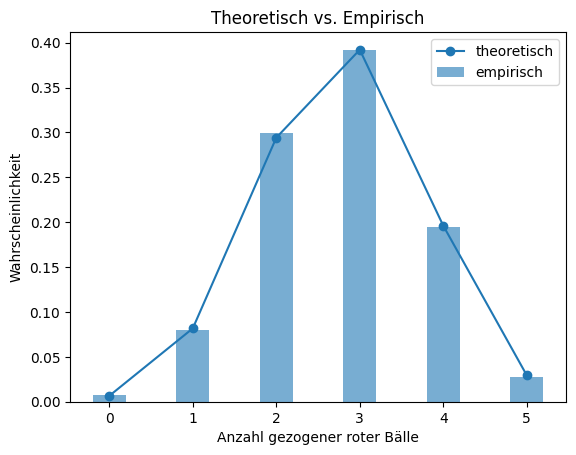

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import hypergeom

# Urne definieren
urn = ['rot'] * 10 + ['blau'] * 5 + ['grün'] * 3

# 1) Ziehungen ohne Zurücklegen simulieren
n_draws = 5               # pro Experiment
n_experiments = 10000
counts_rot = []

for _ in range(n_experiments):
    sample = np.random.choice(urn, size=n_draws, replace=False)
    counts_rot.append(np.count_nonzero(np.array(sample) == 'rot'))

# 2) Empirische Verteilung plotten
values, freqs = np.unique(counts_rot, return_counts=True)
probs_emp = freqs / n_experiments

plt.bar(values, probs_emp, width=0.6, edgecolor='black', alpha=0.7)
plt.xlabel('Anzahl gezogener roter Bälle')
plt.ylabel('Empirische Wahrscheinlichkeit')
plt.title('Simulation: Hypergeometrische Verteilung (ohne Zurücklegen)')
plt.xticks(values)
plt.show()

# 3) Theoretische Hypergeometrische Wahrscheinlichkeiten
N, K, n = 18, 10, n_draws
k = np.arange(0, n_draws+1)
probs_theo = hypergeom.pmf(k, N, K, n)

# 4) Vergleich plotten
plt.plot(k, probs_theo, 'o-', label='theoretisch')
plt.bar(values, probs_emp, width=0.4, label='empirisch', alpha=0.6)
plt.xlabel('Anzahl gezogener roter Bälle')
plt.ylabel('Wahrscheinlichkeit')
plt.title('Theoretisch vs. Empirisch')
plt.legend()
plt.show()

# Diskrete Verteilungen

- **Bernoulli-Verteilung**  
  Modell für einen einzelnen Ja/Nein-Versuch (Erfolg mit Wahrscheinlichkeit $p$, Misserfolg mit $1-p$)  
  $$
    P(X=1) = p,\quad P(X=0) = 1-p.
  $$
  - Erwartungswert: $E[X] = p$  
  - Varianz: $\mathrm{Var}(X) = p(1-p)$

- **PMF (Probability Mass Function)**  
  $$
    P(X = x_i) = p_i
  $$
- **Binomialverteilung**  
  $$
    P(X = k) = \binom{n}{k}\,p^k\,(1-p)^{n-k}
  $$

# Wahrscheinlichkeitsdichte Stetiger Zufallsvariablen

Dieser Abschnitt fasst die wichtigsten Punkte zur Wahrscheinlichkeitsdichte kontinuierlicher Zufallsvariablen zusammen.

---

## 1. Grundbegriffe

- **Dichtefunktion (PDF)**  
  Für eine stetige Zufallsvariable $X$ gilt:  
  $f(x) \ge 0$ und $\displaystyle \int_{-\infty}^{\infty} f(x)\,dx = 1$.

- **Verteilungsfunktion (CDF)**  
  $F(x) = P(X \le x) = \displaystyle \int_{-\infty}^{x} f(t)\,dt$,  
  mit $\lim_{x\to\infty}F(x)=1$ und $\lim_{x\to-\infty}F(x)=0$.

- **Wahrscheinlichkeit eines Intervalls**  
  $P(a < X \le b) = \displaystyle \int_{a}^{b} f(x)\,dx$.

---

## 2. Eigenschaften der PDF

- **Nichtnegativität:** $f(x)\ge0$ für alle $x$.  
- **Normiertheit:** $\int_{-\infty}^{\infty} f(x)\,dx = 1$.  
- **Punkte:** Einzelne Punkte haben $P(X=x)=0$, nur Intervalle liefern positive Wahrscheinlichkeiten.

---

## 3. Wichtige stetige Verteilungen

### 3.1 Gleichverteilung $U(a,b)$

- **PDF:**  
  $$
  f(x) =
  \begin{cases}
    \tfrac{1}{b-a}, & a \le x \le b,\\
    0, & \text{sonst.}
  \end{cases}
  $$
- **CDF:**  
  $$
  F(x) =
  \begin{cases}
    0, & x < a,\\
    \tfrac{x-a}{b-a}, & a \le x < b,\\
    1, & x \ge b.
  \end{cases}
  $$
- **Erwartungswert:** $E[X] = \tfrac{a+b}{2}$  
- **Varianz:** $\operatorname{Var}(X) = \tfrac{(b-a)^2}{12}$

### 3.2 Exponentialverteilung $\mathrm{Exp}(\lambda)$

- **PDF:**  
  $$
  f(x) =
  \begin{cases}
    \lambda e^{-\lambda x}, & x \ge 0,\\
    0, & x < 0.
  \end{cases}
  $$
- **CDF:**  
  $$
  F(x) =
  \begin{cases}
    1 - e^{-\lambda x}, & x \ge 0,\\
    0, & x < 0.
  \end{cases}
  $$
- **Erwartungswert:** $E[X] = \tfrac{1}{\lambda}$  
- **Varianz:** $\operatorname{Var}(X) = \tfrac{1}{\lambda^2}$

### 3.3 Normalverteilung $\mathcal{N}(\mu,\sigma^2)$

- **PDF:**  
  $$
  f(x) = \frac{1}{\sigma\sqrt{2\pi}}
         \exp\!\Bigl(-\tfrac{(x-\mu)^2}{2\sigma^2}\Bigr)
  $$
- **CDF:**  
  $$
  F(x) = \tfrac{1}{2}\Bigl[1 + \mathrm{erf}\bigl(\tfrac{x-\mu}{\sigma\sqrt{2}}\bigr)\Bigr]
  $$
- **Erwartungswert:** $E[X] = \mu$  
- **Varianz:** $\operatorname{Var}(X) = \sigma^2$

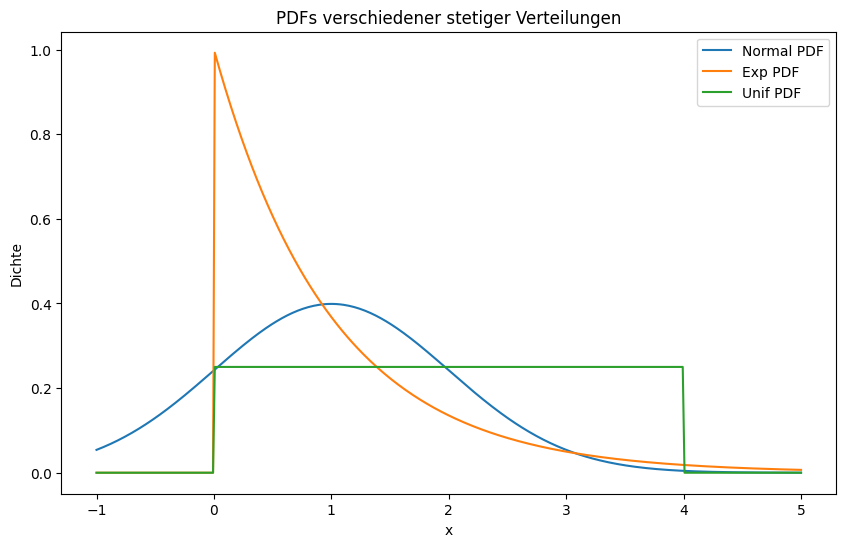

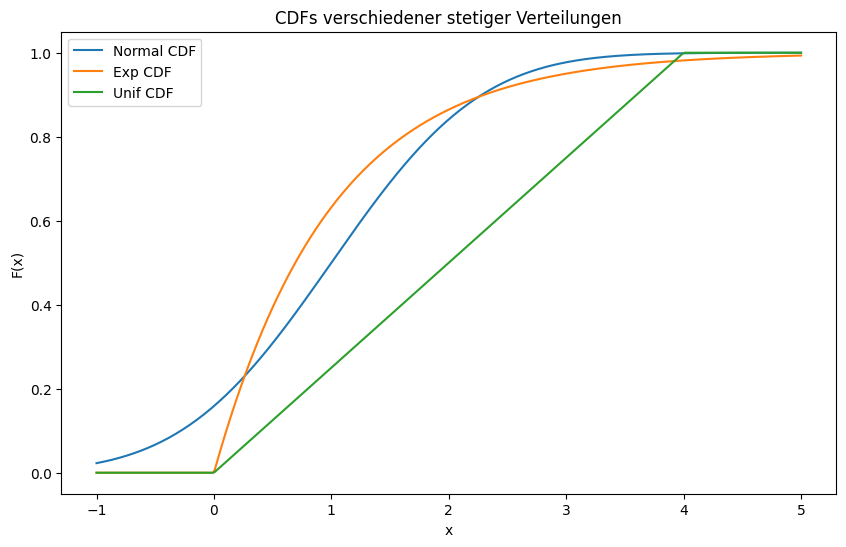

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, expon, uniform

x = np.linspace(-1, 5, 400)

# Normalverteilung N(μ=1, σ=1)
mu, sigma = 1, 1
pdf_norm = norm.pdf(x, loc=mu, scale=sigma)
cdf_norm = norm.cdf(x, loc=mu, scale=sigma)

# Exponentialverteilung λ=1
pdf_exp = expon.pdf(x, scale=1)
cdf_exp = expon.cdf(x, scale=1)

# Gleichverteilung U(0, 4)
pdf_uni = uniform.pdf(x, loc=0, scale=4)
cdf_uni = uniform.cdf(x, loc=0, scale=4)

plt.figure(figsize=(10, 6))
plt.plot(x, pdf_norm, label='Normal PDF')
plt.plot(x, pdf_exp, label='Exp PDF')
plt.plot(x, pdf_uni, label='Unif PDF')
plt.title('PDFs verschiedener stetiger Verteilungen')
plt.xlabel('x')
plt.ylabel('Dichte')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(x, cdf_norm, label='Normal CDF')
plt.plot(x, cdf_exp, label='Exp CDF')
plt.plot(x, cdf_uni, label='Unif CDF')
plt.title('CDFs verschiedener stetiger Verteilungen')
plt.xlabel('x')
plt.ylabel('F(x)')
plt.legend()
plt.show()

## 1. Grundbegriffe

- **Dichtefunktion (PDF)**  
  Für eine stetige Zufallsvariable $X$ gilt:  
  $$f(x)\ge0,\quad \int_{-\infty}^{\infty}f(x)\,dx = 1.$$

- **Wahrscheinlichkeit eines Intervalls**  
  Für $x_1 < x_2$ berechnet sich  
  $$P(x_1 \le X \le x_2)=\int_{x_1}^{x_2}f(x)\,dx.$$

- **Einzelpunkt**  
  Da die Fläche unter einem Punkt null ist, gilt für jeden konkreten Wert $x_0$:  
  $$P(X = x_0)=\int_{x_0}^{x_0}f(x)\,dx=0.$$

- **Verteilungsfunktion (CDF)**  
  $$F(x)=P(X\le x)=\int_{-\infty}^{x}f(t)\,dt.$$

## Zweidimensionale Gaußverteilung

Die Dichte einer 2D-Normalverteilung mit Mittelwertvektor  
$$\vec{\mu} = \begin{pmatrix}\mu_x \\ \mu_y\end{pmatrix}$$
und Kovarianzmatrix  
$$K = \begin{pmatrix}
\sigma_x^2 & \rho\,\sigma_x\,\sigma_y\\
\rho\,\sigma_x\,\sigma_y & \sigma_y^2
\end{pmatrix}$$  
ist gegeben durch  
$$ 
f(\vec{x})  
= \frac{1}{2\pi\,\sqrt{\det K}}  
  \exp\!\bigl(-\tfrac12\,(\vec{x}-\vec{\mu})^\top\,K^{-1}\,(\vec{x}-\vec{\mu})\bigr)  
$$  


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import ipywidgets as widgets

def mvn_pdf(x, y, mu, K):
    diff = np.stack([x-mu[0], y-mu[1]], axis=-1)
    invK = np.linalg.inv(K)
    detK = np.linalg.det(K)
    norm = 1/(2*np.pi*np.sqrt(detK))
    exponent = -0.5 * np.einsum('...i,ij,...j', diff, invK, diff)
    return norm * np.exp(exponent)

def plot_2d_gauss(mu_x, mu_y, sigma_x, sigma_y, rho):
    mu = np.array([mu_x, mu_y])
    K = np.array([[sigma_x**2, rho*sigma_x*sigma_y],
                  [rho*sigma_x*sigma_y, sigma_y**2]])
    
    # Fixed grid for x, y
    x = np.linspace(-5, 5, 200)
    y = np.linspace(-5, 5, 200)
    X, Y = np.meshgrid(x, y)
    
    # PDF values
    Z = mvn_pdf(X, Y, mu, K)
    
    # Plot
    fig, ax = plt.subplots(figsize=(6,6))
    cs = ax.contour(X, Y, Z, levels=6, cmap='viridis')
    ax.clabel(cs, inline=1, fontsize=10)
    
    # 1-Sigma ellipse
    vals, vecs = np.linalg.eigh(K)
    angle = np.degrees(np.arctan2(*vecs[:,0][::-1]))
    width, height = 2*np.sqrt(vals)
    ellipse = Ellipse(mu, width, height, angle=angle, edgecolor='red', fill=False, lw=2)
    ax.add_patch(ellipse)
    
    # Fixed axis limits
    ax.set_xlim(-5, 5)
    ax.set_ylim(-5, 5)
    
    ax.set_aspect('equal')
    ax.set_title(
        f"$\\mu=({mu_x:.1f},{mu_y:.1f}),\\,\\sigma_x={sigma_x},\\,\\sigma_y={sigma_y},\\,\\rho={rho}$"
    )
    plt.show()

widgets.interact(
    plot_2d_gauss,
    mu_x=widgets.FloatSlider(min=-3, max=3, step=0.1, value=0, description='$\\mu_x$'),
    mu_y=widgets.FloatSlider(min=-3, max=3, step=0.1, value=0, description='$\\mu_y$'),
    sigma_x=widgets.FloatSlider(min=0.5, max=2, step=0.1, value=1, description='$\\sigma_x$'),
    sigma_y=widgets.FloatSlider(min=0.5, max=2, step=0.1, value=1, description='$\\sigma_y$'),
    rho=widgets.FloatSlider(min=-0.9, max=0.9, step=0.1, value=0, description='$\\rho$')
)

interactive(children=(FloatSlider(value=0.0, description='$\\mu_x$', max=3.0, min=-3.0), FloatSlider(value=0.0…

<function __main__.plot_2d_gauss(mu_x, mu_y, sigma_x, sigma_y, rho)>

# 1. Erwartungswert und Varianz

## 1.1 Erwartungswert

**Definition:** Der Erwartungswert (oder Mittelwert) einer Zufallsvariablen $X$ ist  
$$
E[X]
=
\begin{cases}
\displaystyle \sum_{x} x\,P(X=x), & \text{wenn $X$ diskret,}\\[8pt]
\displaystyle \int_{-\infty}^{\infty} x\,f_X(x)\,\mathrm{d}x, & \text{wenn $X$ stetig.}
\end{cases}
$$  
Er gibt an, wo „der Schwerpunkt“ der Verteilung liegt.

**Beispiele:**  
- Würfel: $X\sim\mathrm{Unif}\{1,\dots,6\}$  
  $$E[X]
    = \sum_{k=1}^6 k\cdot\frac1{6}
    = 3{,}5.$$
- Bernoulli: $X\sim\mathrm{Bern}(p)$  
  $$E[X] = p.$$
- Binomial: $X\sim\mathrm{Bin}(n,p)$  
  $$E[X] = n\,p.$$
- Normalverteilung: $X\sim\mathcal{N}(\mu,\sigma^2)$  
  $$E[X] = \mu.$$

---

## 1.2 Varianz und Standardabweichung

**Definition:** Die Varianz misst die durchschnittliche quadratische Abweichung vom Erwartungswert:
$$
\mathrm{Var}(X)
= E\bigl[(X - E[X])^2\bigr]
= E[X^2] - \bigl(E[X]\bigr)^2.
$$  
Die Standardabweichung ist die Wurzel der Varianz:
$$
\sigma_X = \sqrt{\mathrm{Var}(X)}.
$$

**Interpretation:**  
- Eine große Varianz bedeutet „starke Streuung“, eine kleine Varianz „enge Konzentration“ um den Mittelwert.

**Beispiele:**  
- $\mathcal{N}(\mu,\sigma^2)$:  
  $$\mathrm{Var}(X)=\sigma^2.$$  
- $\mathrm{Bern}(p)$:  
  $$\mathrm{Var}(X)=p(1-p).$$  
- $\mathrm{Bin}(n,p)$:  
  $$\mathrm{Var}(X)=n\,p\,(1-p).$$  

**Eigenschaften:**  
1. **Linearkombination:** Für $X' = aX+b$ gilt  
   $$\mathrm{Var}(X') = a^2\,\mathrm{Var}(X).$$  
2. **Unabhängigkeit:** Sind $X$ und $Y$ unabhängig, dann  
   $$\mathrm{Var}(X+Y) = \mathrm{Var}(X) + \mathrm{Var}(Y).$$  

---

# 2. Quantile

## 2.1 Definition

Sei $X$ eine reelle Zufallsvariable mit Verteilungsfunktion  
$$
F_X(x) = P(X \le x).
$$  
Für ein gegebenes Niveau $\alpha\in(0,1)$ ist das **$\alpha$-Quantil** $q_\alpha$ definiert als

$$
q_{\alpha}
= \inf\bigl\{\,x\in\mathbb{R}\mid F_X(x)\ge \alpha\bigr\},
$$

sodass
- **Stetig**:  
  $$
  P(X \le q_\alpha)
  = \int_{-\infty}^{q_\alpha} f_X(x)\,\mathrm{d}x
  = \alpha.
  $$
- **Diskret**:  
  $$
  P(X \le q_\alpha)
  = \sum_{x \le q_\alpha} P(X = x)
  = \alpha.
  $$

**Interpretation:**  
- $q_{0.5}$ ist der **Median**, der die Verteilung in zwei gleich große Hälften teilt.  
- $q_{0.25}$ und $q_{0.75}$ sind die **Quartile**, die die Verteilung in vier Teile zerlegen.  

## 2.2 Eigenschaften

- Die Funktion $\alpha \mapsto q_\alpha$ ist monoton wachsend.  
- Für stetige Verteilungen ist $q_\alpha = F_X^{-1}(\alpha)$. 

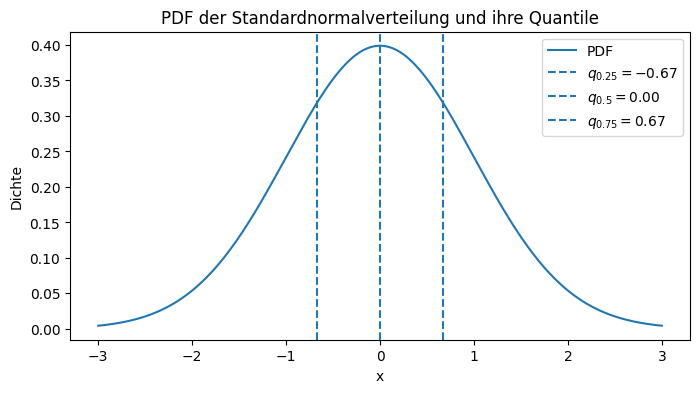

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Beispiel: Standardnormalverteilung
dist = norm(loc=0, scale=1)
x = np.linspace(-3, 3, 400)

# Quantile
alphas = [0.25, 0.5, 0.75]
qs = dist.ppf(alphas)  # Inverse CDF

plt.figure(figsize=(8,4))
plt.plot(x, dist.pdf(x), label='PDF')
for a, q in zip(alphas, qs):
    plt.axvline(q, linestyle='--', label=f'$q_{{{a}}}={q:.2f}$')
plt.title('PDF der Standardnormalverteilung und ihre Quantile')
plt.xlabel('x')
plt.ylabel('Dichte')
plt.legend()
plt.show()

# Zusammenfassung

## 1. Erwartungswert, Varianz, Kovarianz und Korrelation

- **Erwartungswert**  
  - Diskret:  
    $$E[g(X)] = \sum_{x\in X} g(x)\,P(X=x)$$  
  - Stetig:  
    $$E[g(X)] = \int_{-\infty}^{\infty} g(x)\,f_X(x)\,dx$$  
  - Für einen Zufallsvektor $X=(X_1,\dots,X_n)^\top$ gilt  
    $$E[X] = \bigl(E[X_1],E[X_2],\dots,E[X_n]\bigr)^\top.$$

- **Varianz**  
  $$\mathrm{Var}(X) = E\bigl[(X - E[X])^2\bigr] 
    = E[X^2] - \bigl(E[X]\bigr)^2,$$  
  Standardabweichung:  
  $$\sigma_X = \sqrt{\mathrm{Var}(X)}.$$

- **Kovarianz**  
  $$\mathrm{Cov}(X,Y) 
    = E\bigl[(X - E[X])(Y - E[Y])\bigr].$$

- **Korrelationskoeffizient**  
  $$\rho_{X,Y}
    = \frac{\mathrm{Cov}(X,Y)}{\sigma_X\,\sigma_Y},\quad -1\le\rho_{X,Y}\le1.$$

---

## 2. Weitere Konzepte

- **Kovarianzmatrix**  
  Für den Zufallsvektor $X=(X_1,\dots,X_n)^\top$:  
  $$
    \Sigma = \mathrm{Cov}(X)
    = \begin{pmatrix}
        \mathrm{Var}(X_1)   & \dots & \mathrm{Cov}(X_1,X_n) \\
        \vdots              & \ddots& \vdots              \\
        \mathrm{Cov}(X_n,X_1)& \dots & \mathrm{Var}(X_n)
      \end{pmatrix}.
  $$

- **Modalwert**  
  Der Wert $x$ mit  
  $$x = \arg\max_{t} f_X(t),$$  
  also das Maximum der Dichte $f_X(x)$.

- **Quantil**  
  Für $\alpha\in(0,1)$ ist das $\alpha$-Quantil $q_\alpha$ definiert durch  
  $$P(X \le q_\alpha)=\alpha.$$  

- **Median**  
  Das 50 %-Quantil, also  
  $$m = q_{0.5},\quad P(X \le m) = 0.5.$$

# Fragen Diskrete Simulation

## 1. Definition richtig???
**Frage:**  
Stimmen die nachfolgenden Aussagen für eine stetige Verteilungsfunktion $F(Z \le z)$?  
1a) Die Verteilungsfunktion $F(z)$ einer Zufallsvariablen ist die Wahrscheinlichkeit dafür, dass die Zufallsvariable $Z$ einen Wert annimmt, der **mindestens** einem vorgegebenen Wert $z$ entspricht.

**Antwort:**  
Die Aussage ist **falsch**. Für eine stetige Zufallsvariable $Z$ gilt per Definition  
$$
F(z) = P(Z \le z),
$$  
also „höchstens“ bzw. „bis zu“ dem Wert $z$, **nicht** „mindestens“ $z$.  
Das Komplementärereignis „mindestens $z$“ ist  
$$
P(Z \ge z) = 1 - P(Z < z) = 1 - F(z).
$$  

**Frage:**  
1b) Die Formel  
$$P(Z \ge c) = 1 - F(c)$$  
sagt aus, wie groß die Wahrscheinlichkeit ist, dass eine Zufallsvariable $Z$ **größer** als $c$ ist (Abgrenzung nach „oben“). Dabei sei $F(c)$ der Wert der Verteilungsfunktion an der Stelle $c$.

**Antwort:**  
Die Aussage ist **wahr**. Für eine stetige Zufallsvariable $Z$ gilt per Definition  
$$F(c) = P(Z \le c).$$  
Da bei stetigen Verteilungen $P(Z = c) = 0$, folgt  
$$P(Z \ge c) = 1 - P(Z < c) = 1 - F(c).$$  

## 2. Stichproben und Häufigkeiten
Gegeben: Stichprobe der diskreten Zufallsvariablen $x\in\{0,1,2,3\}$ mit Beobachtungen  
$(1,0,1,2,0,1,3,2,3,2)$.

## 2a) Absolute und relative Häufigkeiten

| $x$   | Absolute Häufigkeit $n_i$ | Relative Häufigkeit $f_i = n_i/10$ |
|------:|----------------------------:|------------------------------------:|
| 0     | 2                           | 0.20                                |
| 1     | 3                           | 0.30                                |
| 2     | 3                           | 0.30                                |
| 3     | 2                           | 0.20                                |
| **Summe** | **10**                  | **1.00**                            |

## 2b) Kumulierte relative Häufigkeit
Relative Summenhäufigkeit:
Gegeben geordnete Ausprägungen $x_1 < x_2 < \dots < x_k$ mit relativen Häufigkeiten $f_1, f_2, \dots, f_k$.

- **Definition:**  
  $$F_i = \sum_{j=1}^{i} f_j$$

- **Eigenschaften:**  
  - $F_1 = f_1$  
  - Monoton wachsend:  
    $$0 \le F_1 \le F_2 \le \dots \le F_k = \sum_{j=1}^k f_j = 1$$  
  - $F_k = 1$


| $x$   | $f_i$ | Kumulierte Häufigkeit $F_i=\sum_{j\le i}f_j$ |
|------:|------:|----------------------------------------------:|
| 0     | 0.20  | 0.20                                         |
| 1     | 0.30  | 0.50                                         |
| 2     | 0.30  | 0.80                                         |
| 3     | 0.20  | 1.00                                         |

## 2c) Mittelwert und Varianz

- **Stichprobenmittelwert**  
  $$\bar{x}
    = \frac{1}{n}\sum_{i=1}^n x_i
    = \sum_{x\in\{0,1,2,3\}} x\,f_i
    = 0\cdot0.20 + 1\cdot0.30 + 2\cdot0.30 + 3\cdot0.20
    = 1.70.
  $$

- **Stichprobenvarianz** (mit Teilung durch $n$)  
  $$s^2
    = \frac{1}{n}\sum_{i=1}^n (x_i - \bar{x})^2
    = \sum_{x\in\{0,1,2,3\}} (x - \bar{x})^2\,f_i
    = (0-1.70)^2\cdot0.20 + (1-1.70)^2\cdot0.30 + (2-1.70)^2\cdot0.30 + (3-1.70)^2\cdot0.20
    = 1.09.
  $$

- **Stichproben-Standardabweichung**  
  $$s = \sqrt{s^2} = \sqrt{1.09} \approx 1.044.$$


In [9]:
import numpy as np

data = np.array([1,0,1,2,0,1,3,2,3,2])

# 2a und 2b
values, counts = np.unique(data, return_counts=True)
rel_freq = counts / len(data)
cum_freq = np.cumsum(rel_freq)
for x, n, f, F in zip(values, counts, rel_freq, cum_freq):
    print(f"x={x}: n={n}, f={f:.2f}, F={F:.2f}")

# 2c
mean = data.mean()
var = ((data - mean)**2).mean()  # Varianz mit 1/n
std = np.sqrt(var)
print(f"μ̂ = {mean:.2f}, s^2 = {var:.2f}, s = {std:.2f}")

x=0: n=2, f=0.20, F=0.20
x=1: n=3, f=0.30, F=0.50
x=2: n=3, f=0.30, F=0.80
x=3: n=2, f=0.20, F=1.00
μ̂ = 1.50, s^2 = 1.05, s = 1.02


## 3. Zufallsvariable im Bereich [10,20]
**Aufgabe:**  
Patienten kommen gleichverteilt zwischen 10 Minuten und 20 Minuten. Ein Standard‐Zufallsgenerator liefert Werte $r\sim U(0,1)$. Wie erhält man daraus Zufallszahlen $Z$ im Intervall $[10,20]$?

**Lösung:**  
Für eine Gleichverteilung $Z\sim U(a,b)$ gilt die Verteilungsfunktion $F_Z(z) = (z - a)/(b - a)$ für $z\in[a,b]$.  
Die Inverse ist $F_Z^{-1}(r) = a + (b - a)\,r$.  
Mit $a=10$ und $b=20$ folgt  
$Z = 10 + 10\,r$.

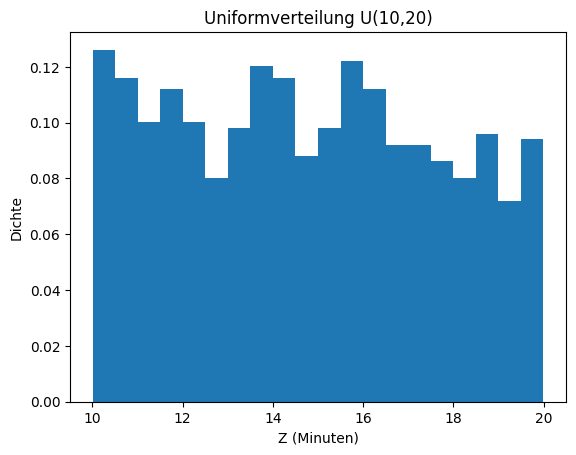

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Standard-Zufallsgenerator r ~ U(0,1)
r = np.random.rand(1000)

# 2. Transformation auf Z ~ U(10,20)
Z = 10 + 10 * r


plt.hist(Z, bins=20, density=True)
plt.xlabel('Z (Minuten)')
plt.ylabel('Dichte')
plt.title('Uniformverteilung U(10,20)')
plt.show()

Angenommen, der interne Zufallsgenerator liefert $r = 0.8215$. Wie lautet die entsprechende Ankunftszeit $T_A$?

**Antwort:**  
$$
T_A = 10 + 10 \cdot r = 10 + 10 \cdot 0.8215 = 18.215
$$
Minuten.

# 4. Wahrscheinlichkeits-Dichte und Verteilungsfunktion
Gegeben sei  
$$
f(z) = 
\begin{cases}
2\,(1 - z), & 0 \le z < 1,\\
0, & \text{sonst.}
\end{cases}
$$

---

## 4a) Skizze von $f(z)$ und $f_g(z)$

- **$f(z)$**: Eine fallende Gerade von $f(0)=2$ bis $f(1)=0$.  
- **$f_g(z)$**: Gleichverteilung $U(0,1)$, also $f_g(z)=1$ für $0\le z<1$.


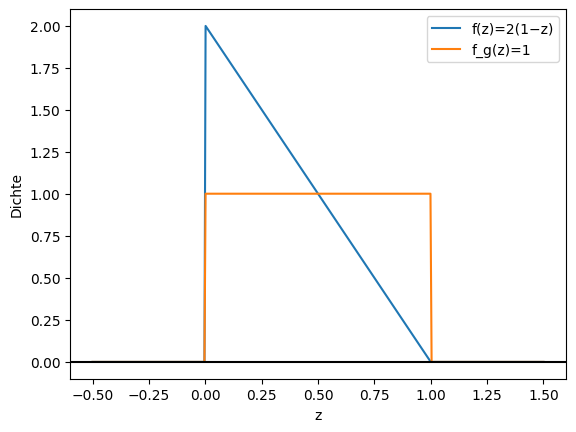

In [13]:
import numpy as np
import matplotlib.pyplot as plt

z = np.linspace(-0.5, 1.5, 400)
f = np.where((z>=0)&(z<1), 2*(1-z), 0)
fg = np.where((z>=0)&(z<1), 1, 0)

plt.plot(z, f, label='f(z)=2(1−z)')
plt.plot(z, fg, label='f_g(z)=1')
plt.axhline(0, color='black')
plt.xlabel('z')
plt.ylabel('Dichte')
plt.legend()
plt.show()

## 4b) Verteilungsfunktion F(z)
Zwei Simulationisten berechneten für die Dichte  
$f(z)=2\,(1-z)$ für $0\le z<1$  
je eine Verteilungsfunktion und fanden:

- Simulationist A ⇒ $F(z)=2z - z^2$  
- Simulationist B ⇒ $F(z)=2z^2 - z$  

Wer hat recht und wie verläuft $F(z)$ im Vergleich zur Gleichverteilung $F_g(z)=z$?
Für die Dichte  
f(z) = 2 (1 − z) für 0 ≤ z < 1  
ergibt sich durch Integration  
$$
F(z) \;=\;\int_{0}^{z} 2\,\bigl(1 - t\bigr)\,dt \;=\;2z - z^2.
$$  
Simulationist A mit  
$$
F(z)=2z - z^2
$$  
liegt damit richtig.

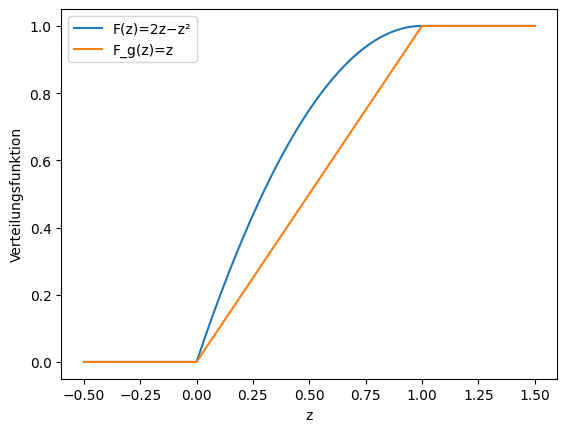

In [14]:
z = np.linspace(-0.5, 1.5, 400)
F = np.where(z<0, 0, np.where(z<1, 2*z - z**2, 1))
Fg = np.where(z<0, 0, np.where(z<1, z, 1))

plt.plot(z, F, label='F(z)=2z−z²')
plt.plot(z, Fg, label='F_g(z)=z')
plt.xlabel('z')
plt.ylabel('Verteilungsfunktion')
plt.legend()
plt.show()

## 4c) Inversion und Beispiel

Um aus \(F(z)=r\) die Zufallszahl \(z\) zu bestimmen, löst man die Gleichung  
$$
2z - z^2 = r
$$  
bzw.  
$$
z^2 - 2z + r = 0.
$$  
Die Lösungen sind  
$$
z = 1 \pm \sqrt{1 - r}.
$$  
Da \(z\) im Intervall \([0,1]\) liegen muss, wählt man  
$$
z = 1 - \sqrt{1 - r}.
$$  

**Beispiel für \(r = 0.4\):**  
$$
z = 1 - \sqrt{1 - 0.4}
  = 1 - \sqrt{0.6}
  \approx 0.2254.
$$